In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [ ]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.Gender.value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [ ]:
df.groupby("Gender").count()

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,,,,,,,,,
Female,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
Male,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499


In [ ]:
df.groupby(["City", "Gender"]).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
City      Gender                                                                
Mandalay  Female         162     162            162           162         162   
          Male           170     170            170           170         170   
Naypyitaw Female         178     178            178           178         178   
          Male           150     150            150           150         150   
Yangon    Female         161     161            161           161         161   
          Male           179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
City      Gender                                                       
Mandalay  Female       162     162    162   162   162      162   162   
          Male         170     170    170   170   170      170   170   
Naypyitaw Female       178     178    178   178   178      178   178   
          Male         150     150    150   150   150      150   150   
Yangon    Female       161     161    161   161   161      161   161   
          Male         179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
City      Gender                                                 
Mandalay  Female                      162           162     162  
          Male                        170           170     170  
Naypyitaw Female                      178           178     178  
          Male                        150           150     150  
Yangon    Female                      161           161     161  
          Male                        179           179     179

In [ ]:
df["Customer type"]

0      Member
1      Normal
2      Normal
3      Member
4      Normal
        ...  
995    Normal
996    Normal
997    Member
998    Normal
999    Member
Name: Customer type, Length: 1000, dtype: object

In [ ]:
df["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
total = df.groupby('Customer type')['Total'].sum()
print(total)

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64


In [ ]:
avg = df.groupby('Product line')['Quantity'].mean()
print(avg)

Product line
Electronic accessories    5.711765
Fashion accessories       5.067416
Food and beverages        5.471264
Health and beauty         5.618421
Home and lifestyle        5.693750
Sports and travel         5.542169
Name: Quantity, dtype: float64


In [ ]:
sumg = df.groupby('Payment')['gross income'].sum()
print(sumg)

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross income, dtype: float64


In [ ]:
#create another column and in it the value of income should low, mid, high
#for low below 10, for mid 10-30 for high above 30

def categorize_income(gross_income):
    if gross_income < 10:
        return 'low'
    elif 10 <= gross_income <= 30:
        return 'mid'
    else:
        return 'high'

df['Income Category'] = df['gross income'].apply(categorize_income)
print(df[['gross income', 'Income Category']])

     gross income Income Category
0         26.1415             mid
1          3.8200             low
2         16.2155             mid
3         23.2880             mid
4         30.2085            high
..            ...             ...
995        2.0175             low
996       48.6900            high
997        1.5920             low
998        3.2910             low
999       30.9190            high

[1000 rows x 2 columns]


In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Income Category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,mid
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,low
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,mid
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,mid
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,low
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,high
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,low
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,low


In [ ]:
df["Gender"]
pd.get_dummies(df.Gender)

,Female,Male
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True
...,...,...
995,False,True
996,True,False
997,False,True
998,False,True


In [ ]:
pd.get_dummies(df.Gender,drop_first = True)

,Male
0,False
1,False
2,True
3,True
4,True
...,...
995,True
996,False
997,True
998,True


In [ ]:
def categorize_gender(x):
    if x == "Male":
        return 1
    else:
        return 0
df['Sex'] = df['Gender'].apply(categorize_gender)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Income Category,Sex
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,mid,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,low,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,mid,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,mid,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,low,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,high,0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,low,1
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,low,1


In [ ]:
df.pivot_table(                #method 1
    values='gross income',
    columns='Customer type',
    aggfunc='max'

)

Customer type,Member,Normal
gross income,49.65,49.49


In [ ]:
df.groupby("Payment")["gross income"].max()     #method 2

Payment
Cash           47.79
Credit card    49.65
Ewallet        49.26
Name: gross income, dtype: float64

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=4ad6bdad5e2941459515e5841ae36aaa9b6364256b604d49a20cd74dd0c4dfea
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-29-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
x = ProfileReport(df)

In [ ]:
x.to_file("demo.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = [10,20,30,40,50]
y = [5,4,3,7,9]

Text(0, 0.5, 'y axis')

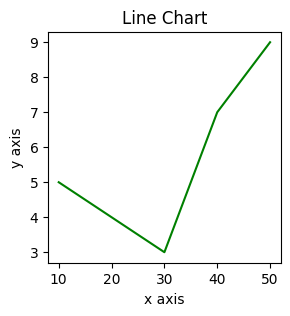

In [ ]:
plt.figure(figsize = (3,3))
plt.plot(x,y,color = 'g')
plt.title('Line Chart')
plt.xlabel("x axis")
plt.ylabel("y axis")

<BarContainer object of 5 artists>

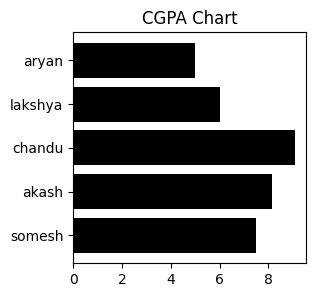

In [ ]:
plt.figure(figsize = (3,3))
plt.title('CGPA Chart')
x = ["somesh","akash","chandu","lakshya","aryan"]
y = [7.5,8.15,9.08,6,5]
plt.barh(x,y, color = 'black') #plt.bar(x,y)

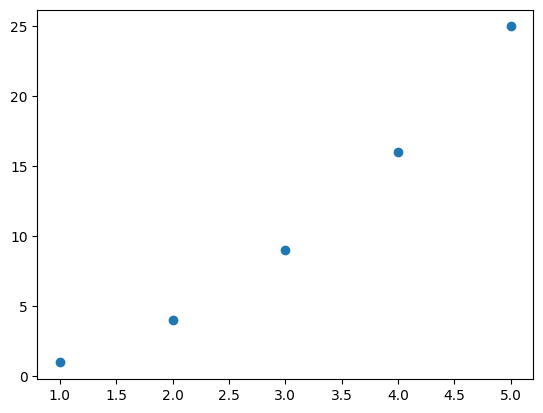

In [ ]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.scatter(x,y) #positive

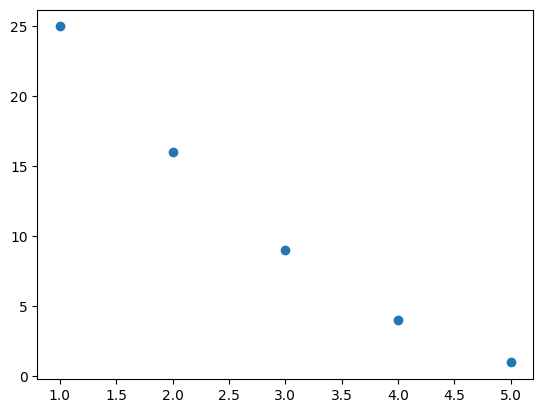

In [ ]:
x = [1,2,3,4,5]
y = [25,16,9,4,1]
plt.scatter(x,y) #negative

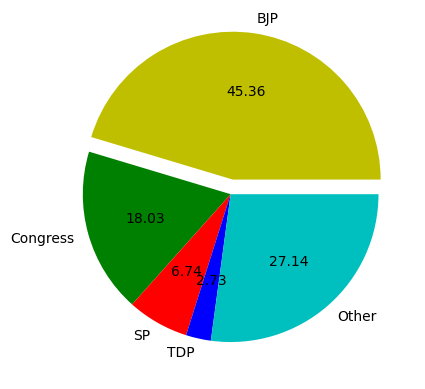

In [ ]:
seat = [249,99,37,15,149]
explode = [0.1,0,0,0,0]
col = ["y","g","r","b","c"]
parties = ["BJP","Congress","SP","TDP","Other"]
plt.pie(seat, labels = parties, autopct = "%.2f",explode = explode, colors = col)
plt.show()

In [ ]:
import numpy as np

In [ ]:
np.random.seed(2)
x = np.random.randint(10,100000,1000)

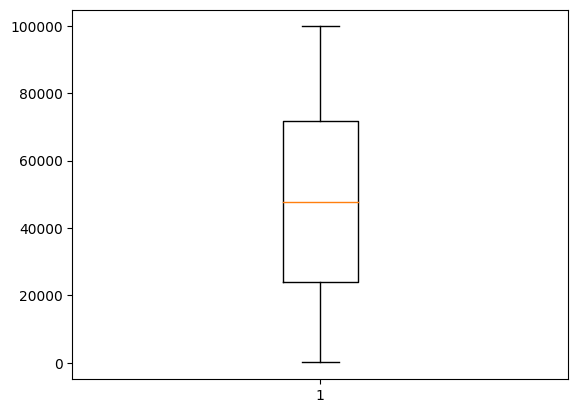

In [ ]:
plt.boxplot(x)
plt.show()

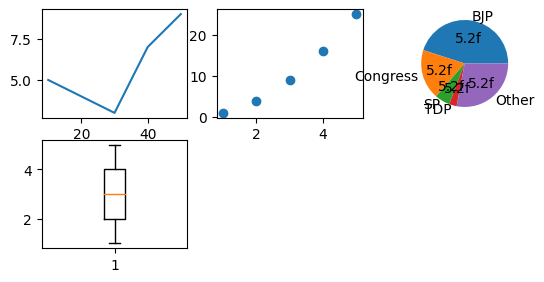

In [ ]:
plt.subplot(3,3,1)
x=[10,20,30,40,50]
y=[5,4,3,7,9]
plt.plot(x,y)
plt.subplot(3,3,2)
x=[1,2,3,4,5]
y=[1,4,9,16,25]
plt.scatter(x,y)
plt.subplot(3,3,3)
seat=[240,99,30,15,149]
xplode=[0,1,0,0,0]
col=["y","g","r","k","c"]
party=["BJP","Congress","SP","TDP","Other"]
plt.pie(seat,labels=party,autopct="5.2f")
plt.show
plt.subplot(3,3,4)
plt.boxplot(x)
plt.show()

In [ ]:
import seaborn as sns

<Axes: xlabel='Customer type', ylabel='count'>

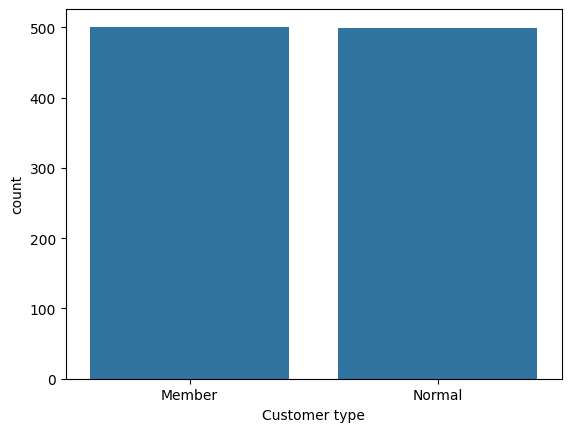

In [ ]:
sns.countplot(x="Customer type", data=df)

<Axes: xlabel='Date', ylabel='gross income'>

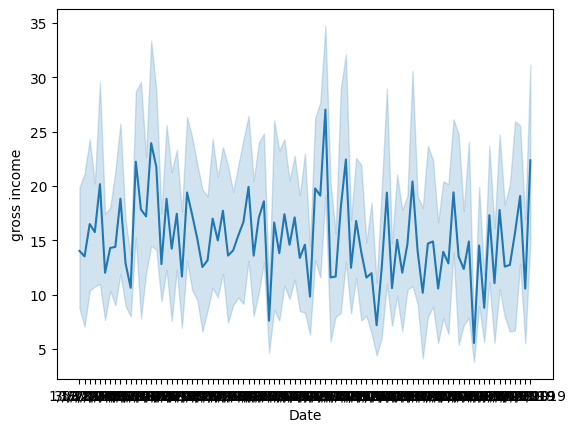

In [ ]:
sns.lineplot(x = "Date",y = "gross income",data=df)

<Axes: xlabel='Gender', ylabel='Unit price'>

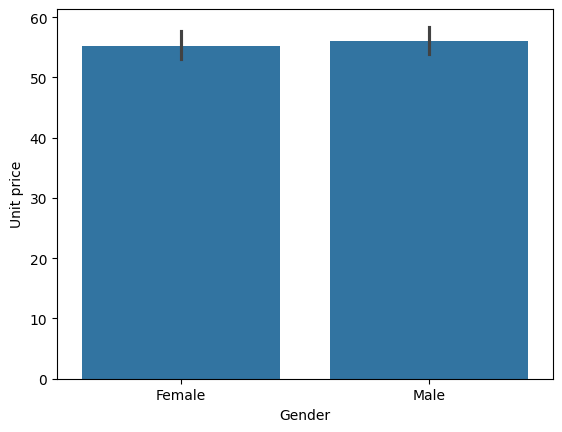

In [ ]:
sns.barplot(x="Gender",y="Unit price",data = df)

(array([ 95., 113.,  91.,  94., 105.,  90.,  95., 109.,  91., 117.]),
 array([10.08 , 19.068, 28.056, 37.044, 46.032, 55.02 , 64.008, 72.996,
        81.984, 90.972, 99.96 ]),
 <BarContainer object of 10 artists>)

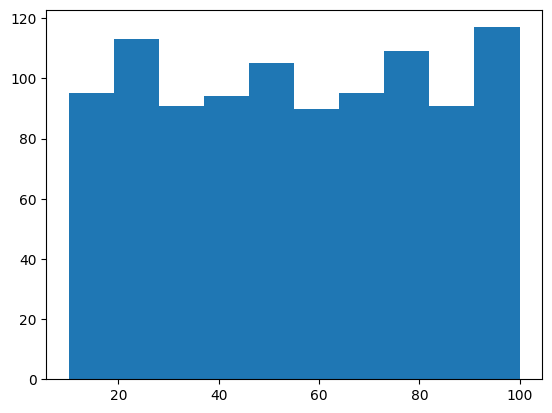

In [ ]:
plt.hist(df["Unit price"])

<Axes: xlabel='Unit price', ylabel='Count'>

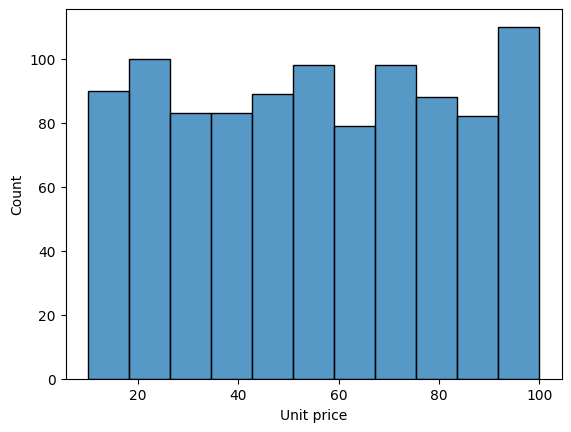

In [ ]:
sns.histplot(x="Unit price",data=df)

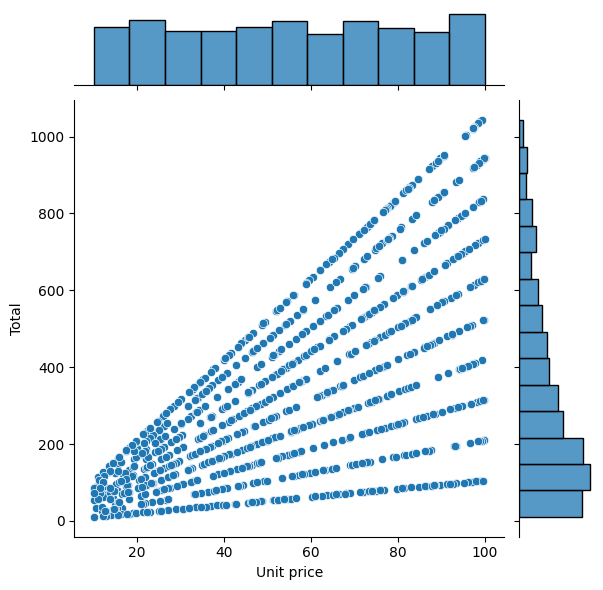

In [ ]:
sns.jointplot(x="Unit price", y="Total",data=df)

<Axes: xlabel='Unit price', ylabel='Total'>

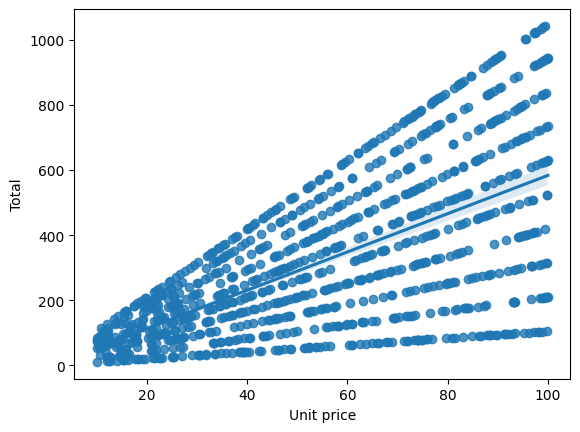

In [ ]:
sns.regplot(x="Unit price",y="Total",data=df)

<Axes: xlabel='Total'>

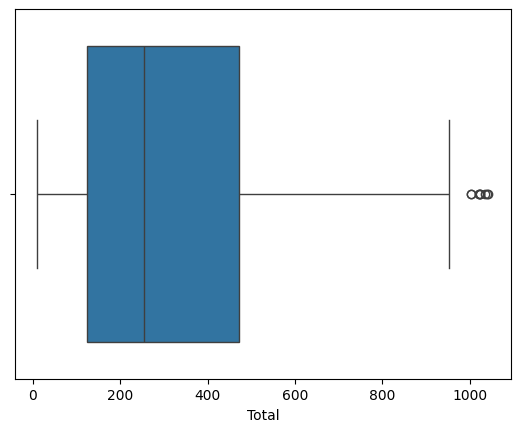

In [ ]:
sns.boxplot(x="Total",data=df)

<Axes: >

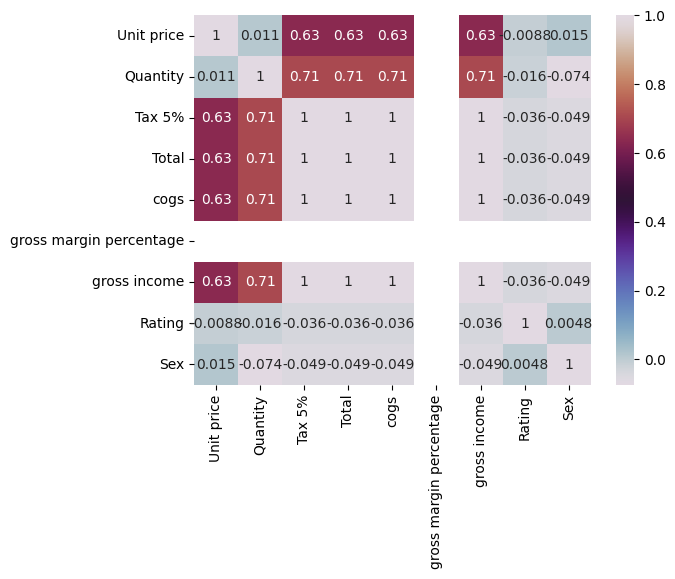

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "twilight")